#Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
glass = pd.read_csv('/Users/tanayapawar/Downloads/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

Say these types are subdivisions of broader glass types:

*   Window glass: types 1, 2, and 3
*   Household glass: types 5, 6, and 7




**Create a new household column that indicates whether or not a row is household glass, coded as 1 or 0, respectively**

In [6]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [7]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

##Q1 . Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [8]:
def eval_thresholds(model, X_test, y_test, thresholds, element=None):
    """
    Evaluate the model at different probability thresholds and print metrics.

    Parameters:
    - model: Trained logistic regression model
    - X_test: Features for testing
    - y_test: Ground truth labels for testing
    - thresholds: List of thresholds to evaluate
    - element: Name of the element being evaluated (optional)
    """
    # Predict probabilities for the positive class
    probs = model.predict_proba(X_test)[:, 1]

    # Evaluate metrics for each threshold
    for threshold in thresholds:
        # Convert probabilities to binary predictions
        predictions = (probs >= threshold).astype(int)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        # Display the results
        if element:
            print(f"Element: {element}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, "
                  f"Precision: {precision:.2f}, Recall: {recall:.2f}")
        else:
            print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, "
                  f"Precision: {precision:.2f}, Recall: {recall:.2f}")

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Define thresholds to evaluate
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

In [12]:
# Evaluate the model at different thresholds
eval_thresholds(model, X_test, y_test, thresholds)

Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Threshold: 0.40, Accuracy: 0.88, Precision: 0.75, Recall: 0.82
Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Threshold: 0.60, Accuracy: 0.84, Precision: 0.83, Recall: 0.45
Threshold: 0.70, Accuracy: 0.84, Precision: 1.00, Recall: 0.36


##Q2. Do the same analysis for other columns

In [13]:
def train_and_eval(glass, elements, thresholds):
    """
    Train and evaluate logistic regression models for different elements.

    Parameters:
    - glass: DataFrame containing the data
    - elements: List of elements to evaluate
    - thresholds: List of thresholds to evaluate
    """
    for element in elements:
        X = glass[[element]].values  # Ensure X is a 2D array
        y = glass['household']

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train a logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Evaluate the model for the current element
        eval_thresholds(model, X_test, y_test, thresholds, element=element)

In [14]:
# List of elements to evaluate
elements = ['RI', 'Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [15]:
# Train and evaluate models for each element
train_and_eval(glass, elements, thresholds)

Element: RI, Threshold: 0.30, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.40, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.50, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.60, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element: RI, Threshold: 0.70, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element: Na, Threshold: 0.30, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element: Na, Threshold: 0.40, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element: Na, Threshold: 0.50, Accuracy: 0.86, Precision: 0.86, Recall: 0.55
Element: Na, Threshold: 0.60, Accuracy: 0.81, Precision: 0.80, Recall: 0.36
Element: Na, Threshold: 0.70, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element: Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.77, Recall: 0.91
Element: Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.73, Recall: 0.73
Element: Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element: Mg,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

##Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [16]:
def preprocess_and_train_model(glass, target_column, drop_columns):
    """
    Preprocess the data, train a logistic regression model, and calculate accuracy.

    Parameters:
    - glass: DataFrame containing the data.
    - target_column: The name of the target variable.
    - drop_columns: List of columns to drop from the features.

    Returns:
    - accuracy: Accuracy of the model on the test set.
    """
    # Separate features and target
    X = glass.drop(columns=drop_columns)
    y = glass[target_column]

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numeric and categorical features
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Define preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing for both types of features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Define the complete pipeline with preprocessing and classifier
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate and return accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [17]:
# Define parameters
target_column = 'household'
drop_columns = ['Type', 'household']

In [18]:
# Call the function and print the accuracy
accuracy = preprocess_and_train_model(glass, target_column, drop_columns)
print("Accuracy:", accuracy)

Accuracy: 0.9069767441860465


##4. Plot ROC Curves for each model

In [19]:
def plot_roc_curve(model, X_test, y_test, model_name):
    """
    Plot the ROC curve for a logistic regression model.

    Parameters:
    - model: Trained logistic regression model
    - X_test: Features for testing
    - y_test: Ground truth labels for testing
    - model_name: Name of the model or feature being evaluated
    """
    # Predict probabilities for the positive class
    probs = model.predict_proba(X_test)[:, 1]

    # Compute FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(y_test, probs)

    # Compute AUC
    auc_score = roc_auc_score(y_test, probs)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

In [20]:
def train_model_per_feature(glass, elements, target_column):
    """
    Train logistic regression models on each feature individually and plot ROC curves.

    Parameters:
    - glass: DataFrame containing the data
    - elements: List of feature columns to evaluate
    - target_column: Name of the target variable
    """
    y = glass[target_column]
    plt.figure(figsize=(10, 8))

    for element in elements:
        # Prepare data for the current feature
        X = glass[[element]].values  # Single feature as input
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Plot ROC curve for the current feature
        plot_roc_curve(model, X_test, y_test, model_name=element)

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Individual Features')
    plt.legend()
    plt.show()

In [21]:
def train_model_on_all_features(glass, target_column, drop_columns):
    """
    Train logistic regression model on all features and plot ROC curve.

    Parameters:
    - glass: DataFrame containing the data
    - target_column: The name of the target variable
    - drop_columns: List of columns to drop from the features
    """
    # Separate features and target
    X = glass.drop(columns=drop_columns)
    y = glass[target_column]

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numeric and categorical features
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Define preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Define the complete pipeline with preprocessing and classifier
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

    # Train the model
    clf.fit(X_train, y_train)

    # Plot the ROC curve
    plt.figure(figsize=(10, 8))
    plot_roc_curve(clf, X_test, y_test, model_name='All Features')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for All Features')
    plt.legend()
    plt.show()

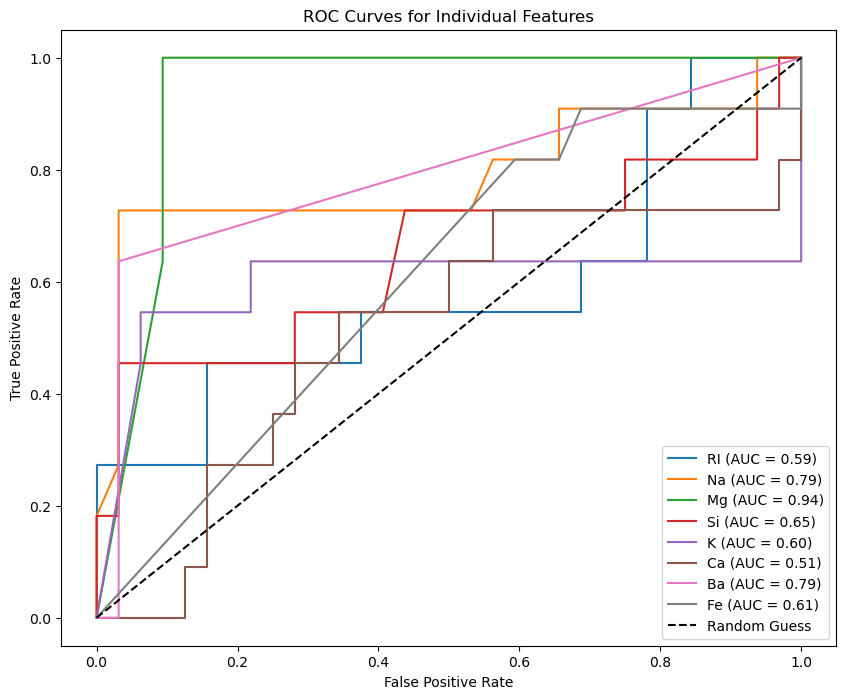

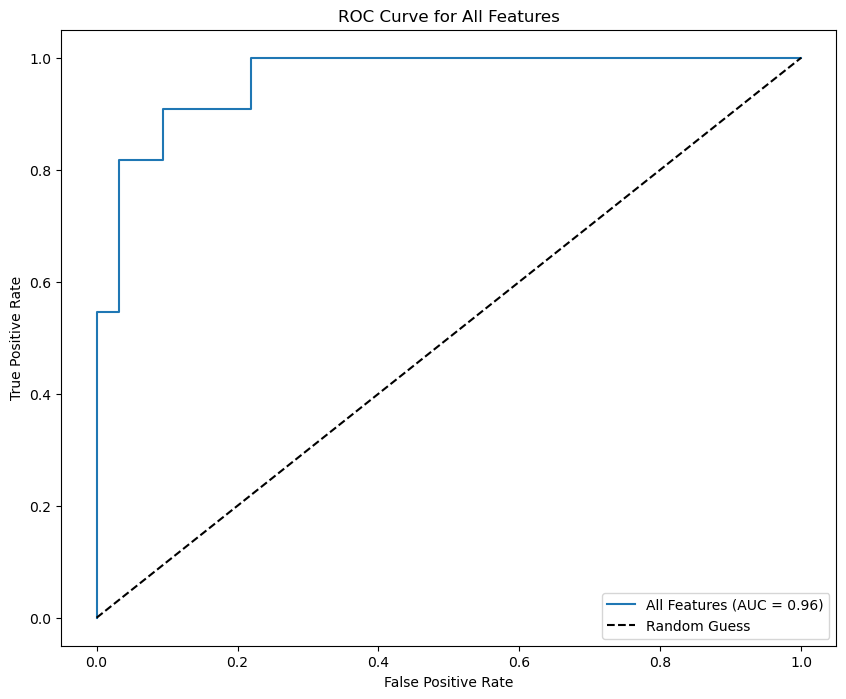

In [22]:
train_model_per_feature(glass, elements, target_column)
train_model_on_all_features(glass, target_column, drop_columns)

###Observations:  

**1.ROC curve for all features graph:**   

The AUC (Area Under the Curve) is 0.96, which suggests that the model trained on all features performs extremely well at distinguishing between the two classes (household vs. not).

**2.ROC curve for Individual features graph:**  


*   Best-performing feature:
  *   Mg (Magnesium) has the highest AUC (0.94), indicating it is the most predictive individual feature.
*   Moderately performing features:
  *  Features like Na (Sodium) and Ba (Barium) have decent AUC scores (0.79), showing moderate predictive power.


*   Poorly performing features:  
  *  Features like RI (Refractive Index), Ca (Calcium), and K (Potassium) have AUC scores close to 0.5, indicating poor performance.


This explains why the combined model (from the first graph) performs much better as it captures interactions and complementary information across features.

####**Here we learned how the ROC curves and AUC values provide a clear comparison of the discriminative power of the models and features.**




#Clustering

##1. Repeat the above exercise for different values of k
*   How do the inertia and silhouette scores change?
*   Is there a 'right' k? Why or why not?



In [27]:
df = pd.read_csv("/Users/tanayapawar/Downloads/iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


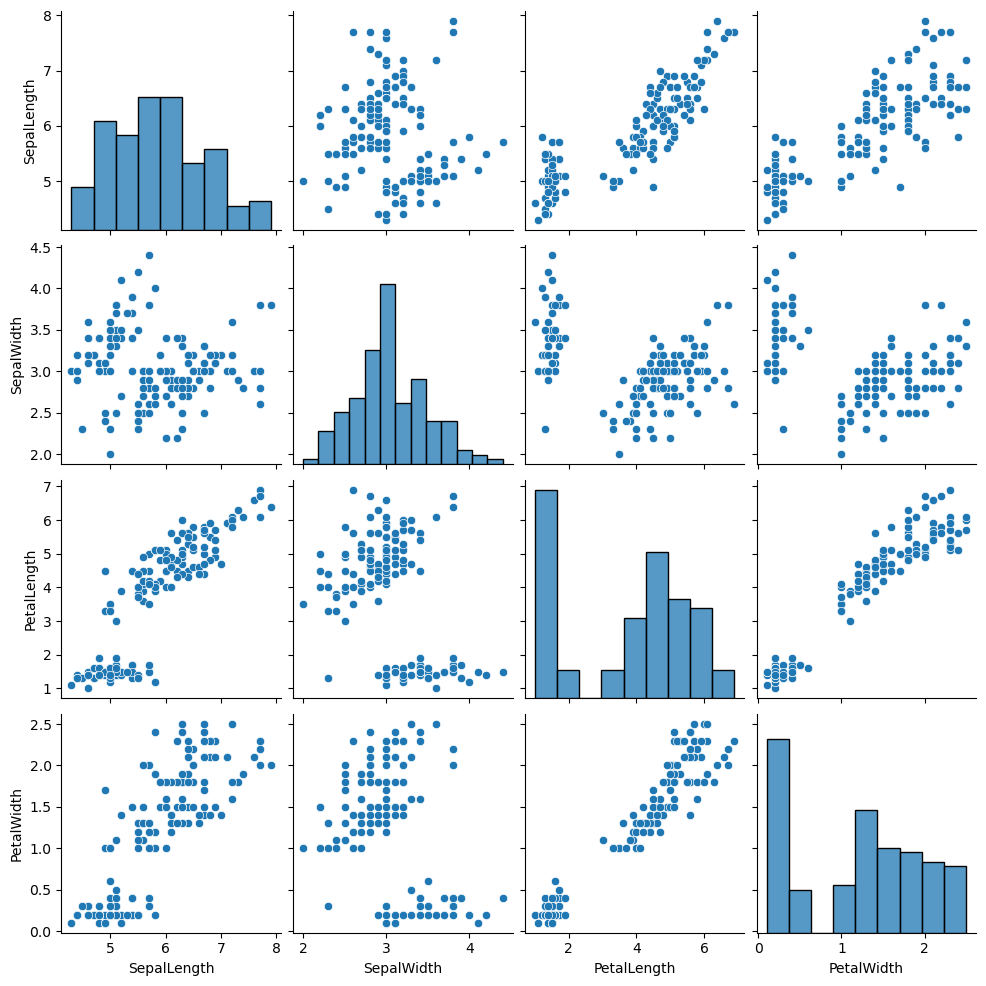

In [28]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [29]:
#Pre-processing since each of our features have different units and ranges
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [30]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [31]:
def evaluate_k_means(X_scaled, max_k=10):
    """
    Evaluate K-Means clustering for different values of k using inertia and silhouette score.

    Parameters:
    - X_scaled: Preprocessed and scaled feature matrix.
    - max_k: Maximum number of clusters to test.

    Returns:
    - inertia_scores: List of inertia values for each k.
    - silhouette_scores: List of silhouette scores for each k.
    """
    inertia_scores = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        # Apply K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)

        # Compute inertia
        inertia_scores.append(kmeans.inertia_)

        # Compute silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)

        # Print metrics for each k
        print(f"k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.2f}")

    return inertia_scores, silhouette_scores

In [32]:
inertia_scores, silhouette_scores = evaluate_k_means(X_scaled, max_k=10, )

k=2, Inertia=12.14, Silhouette Score=0.63
k=3, Inertia=7.14, Silhouette Score=0.48
k=4, Inertia=5.54, Silhouette Score=0.44
k=5, Inertia=5.00, Silhouette Score=0.42
k=6, Inertia=4.07, Silhouette Score=0.34
k=7, Inertia=3.51, Silhouette Score=0.35
k=8, Inertia=3.16, Silhouette Score=0.34
k=9, Inertia=2.82, Silhouette Score=0.32
k=10, Inertia=2.62, Silhouette Score=0.31


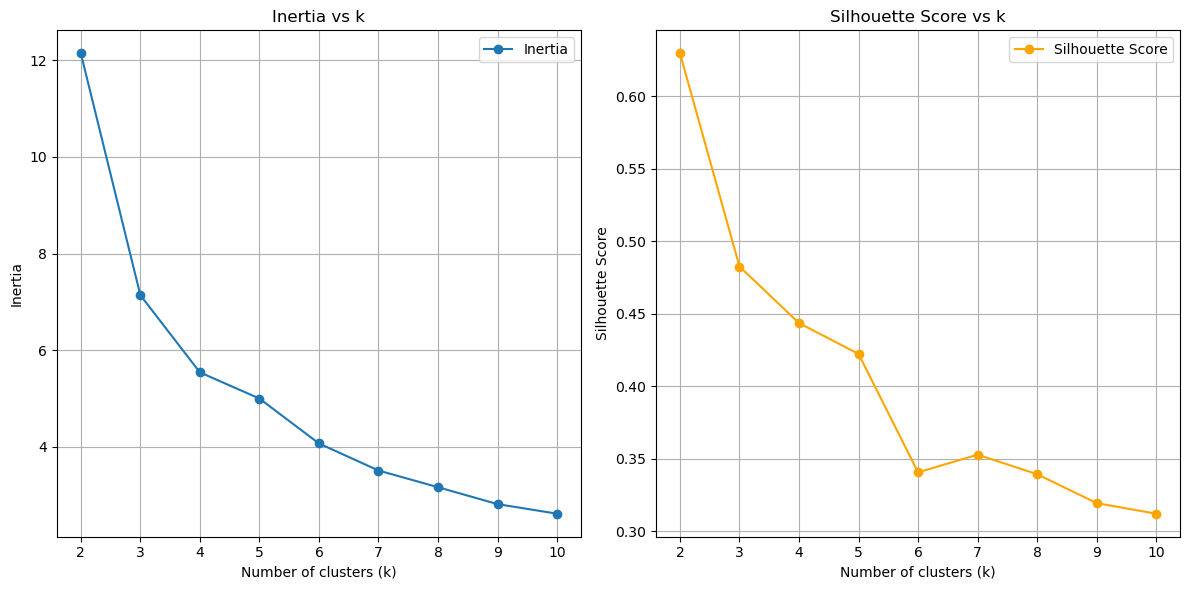

In [33]:
# Plot inertia and silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_scores, marker='o', label='Inertia')
plt.title('Inertia vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

###Observations:  

**1.Inertia Plot (Left)**   


* The inertia decreases steadily as k increases which was expected because more clusters result in smaller within-cluster distances.
* The "elbow" point appears around k=3, where the rate of decrease slows significantly. This suggests 3 clusters might be a good choice.

**2.Silhouette Score Plot (Right)**  



* The silhouette score is highest at k=2 (0.63) and decreases as k increases.
* At k=3, the silhouette score drops to 0.50, indicating moderately defined clusters.
* For k > 3, the silhouette score drops further, suggesting less well-separated clusters.

**Choosing k:**  


*   Optimal k from the elbow method: k=3 appears reasonable as the elbow point.
*   Optimal k from silhouette scores: k=2 has the highest silhouette score, but this could indicate over-simplification (clustering into two groups rather than capturing three species in the Iris dataset)

For the Iris dataset, k=3 is a good choice based on the elbow method, aligning with the known 3 species in the data.



##What if you don't scale your features?



K-Means clustering is sensitive to feature magnitudes.

K-Means minimizes the sum of squared distances between data points and their respective cluster centers. These distances are computed in the feature space.

* Features with larger numerical ranges (e.g., petal_length or petal_width in the Iris dataset) will dominate the clustering process.

* Features with smaller ranges (e.g., sepal_width) will have less influence on the clustering result, even if they are important for distinguishing clusters.



In [34]:
inertia_no_scaling, silhouette_no_scaling = evaluate_k_means(df[cols], max_k=10)

k=2, Inertia=152.37, Silhouette Score=0.68
k=3, Inertia=78.95, Silhouette Score=0.55
k=4, Inertia=57.44, Silhouette Score=0.50
k=5, Inertia=46.54, Silhouette Score=0.49
k=6, Inertia=39.25, Silhouette Score=0.36
k=7, Inertia=35.04, Silhouette Score=0.36
k=8, Inertia=30.22, Silhouette Score=0.34
k=9, Inertia=28.76, Silhouette Score=0.31
k=10, Inertia=28.42, Silhouette Score=0.29


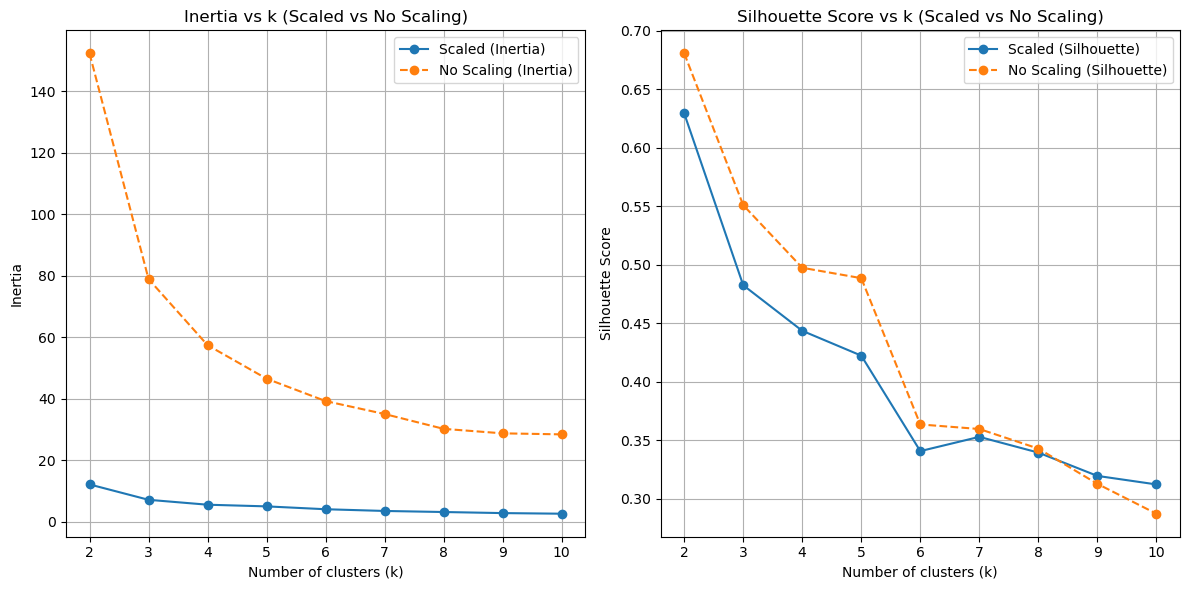

In [35]:
# Plot comparisons of inertia and silhouette scores (scaled vs. unscaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_scores, marker='o', label='Scaled (Inertia)')
plt.plot(range(2, 11), inertia_no_scaling, marker='o', linestyle='--', label='No Scaling (Inertia)')
plt.title('Inertia vs k (Scaled vs No Scaling)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Scaled (Silhouette)')
plt.plot(range(2, 11), silhouette_no_scaling, marker='o', linestyle='--', label='No Scaling (Silhouette)')
plt.title('Silhouette Score vs k (Scaled vs No Scaling)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

###Observation

1. Inertia vs. Number of Clusters (k) (Left)


* Scaled Data (Solid Blue Line):
  * Inertia values are significantly lower since scaling ensures all features contribute equally to the distance computation.
  * The "elbow point" is evident around k=3, indicating that 3 clusters may be a reasonable choice for the scaled dataset.  

* Non-Scaled Data (Dashed Orange Line):  

  * Inertia values are much higher because features with larger ranges (e.g., PetalLength, PetalWidth) dominate the clustering process.
  * The elbow point is less pronounced, making it harder to identify the optimal number of clusters. This is a common issue when clustering with non-scaled data

2. Silhouette Score vs. Number of Clusters (k) (Right)


* Scaled Data (Solid Blue Line):  

  * The silhouette score is highest for k=2 (around 0.6) and drops for higher values of k.
  * At k=3, the silhouette score is still relatively reasonable (~0.5), which aligns with the expected number of clusters for the Iris dataset.  

* Non-Scaled Data (Dashed Orange Line):

  * The silhouette score is initially higher for k=2 but drops off more steeply as k increases.
  * The silhouette score for non-scaled data is generally higher than scaled data for small k, but this does not necessarily indicate better clustering. It could be due to dominance by certain features.


  **Conclusion:**
  
* For scaled data, k=3 is a reasonable choice based on both the inertia elbow point and the silhouette score.
* For non-scaled data, the clustering results are less reliable, and the optimal k is harder to interpret.



####**Here we learned:**

* Always scale your features when applying K-Means clustering to ensure unbiased and interpretable results.
* Inertia is useful for identifying the elbow point and reducing within-cluster variance.
* Silhouette score provides additional validation by measuring the separation between clusters.

